In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = "D:/Eduent Internships/VOIS/1730285881-Airbnb_Open_Data.xlsx"
SHEET_NAME = 'in'
OUT_DIR = './airbnb_figures'
os.makedirs(OUT_DIR, exist_ok=True)

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_excel(FILE_PATH, sheet_name=SHEET_NAME)

numeric_cols = [
    'price', 'service fee', 'availability 365', 'review rate number',
    'calculated host listings count', 'Construction year', 
    'number of reviews', 'minimum nights'
]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:

problem_statement = (
    "Problem Statement: Airbnb Hotel Booking Analysis\n\n"
    f"This analysis uses an Airbnb listing dataset (N = {len(df):,}) to investigate property types, "
    "neighbourhood dynamics, pricing, host characteristics, review behavior, and availability. "
    "The goal is to extract actionable insights for stakeholders: which neighborhoods and room types "
    "dominate the market, how price interacts with service fee and construction year, whether verified hosts "
    "get better reviews, and whether multi-listing hosts maintain more availability."
)
print(problem_statement)


Problem Statement: Airbnb Hotel Booking Analysis

This analysis uses an Airbnb listing dataset (N = 102,599) to investigate property types, neighbourhood dynamics, pricing, host characteristics, review behavior, and availability. The goal is to extract actionable insights for stakeholders: which neighborhoods and room types dominate the market, how price interacts with service fee and construction year, whether verified hosts get better reviews, and whether multi-listing hosts maintain more availability.


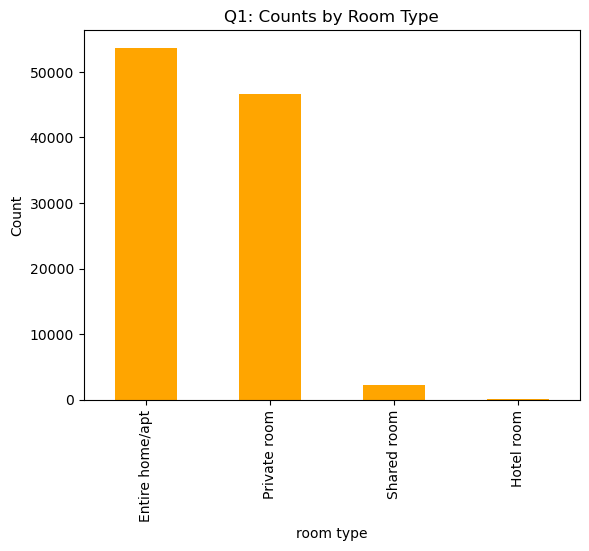

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

In [4]:
q1 = df['room type'].value_counts(dropna=False)
q1.plot(kind='bar', color='orange')
plt.title("Q1: Counts by Room Type")
plt.ylabel("Count")
plt.show()
q1


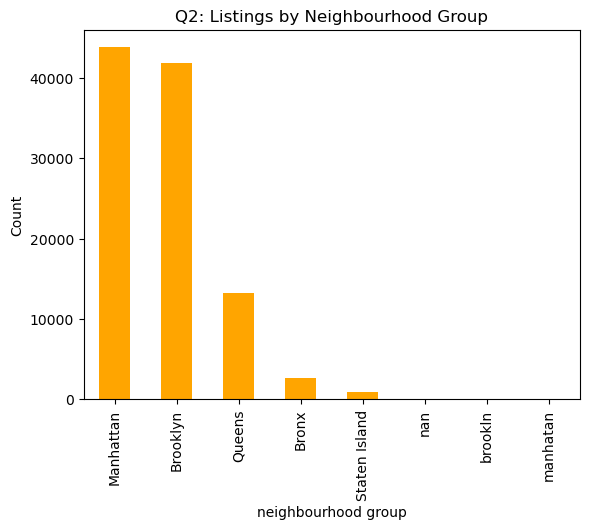

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
NaN                 29
brookln              1
manhatan             1
Name: count, dtype: int64

In [5]:
q2 = df['neighbourhood group'].value_counts(dropna=False)
q2.plot(kind='bar', color='orange')
plt.title("Q2: Listings by Neighbourhood Group")
plt.ylabel("Count")
plt.show()
q2


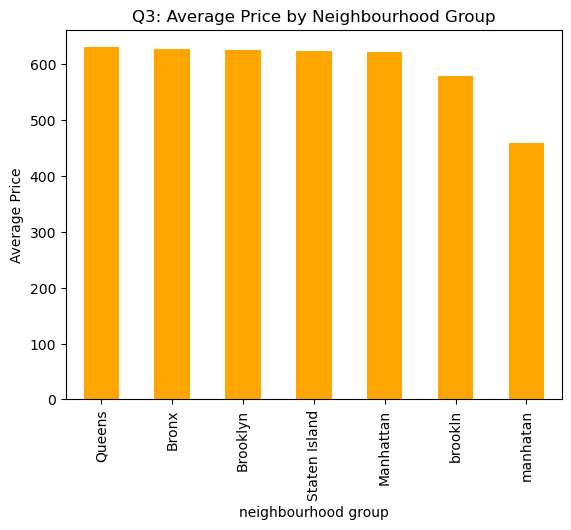

neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

In [6]:
q3 = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
q3.plot(kind='bar', color='orange')
plt.title("Q3: Average Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()
q3


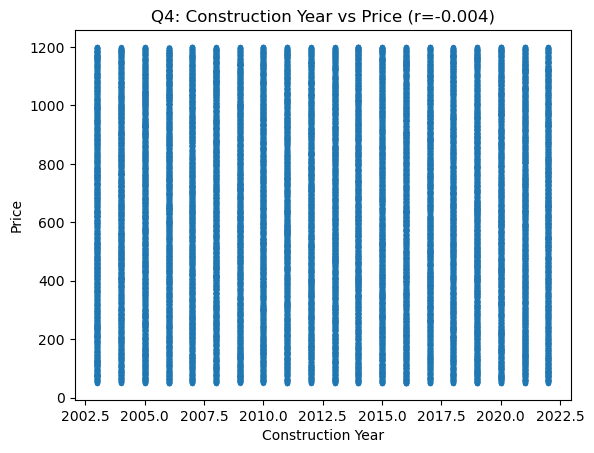

-0.0037532946485525982

In [7]:
df_q4 = df[['Construction year','price']].dropna()
corr_c4 = df_q4['Construction year'].corr(df_q4['price'])
plt.scatter(df_q4['Construction year'], df_q4['price'], s=8, alpha=0.4)
plt.title(f"Q4: Construction Year vs Price (r={corr_c4:.3f})")
plt.xlabel("Construction Year")
plt.ylabel("Price")
plt.show()
corr_c4


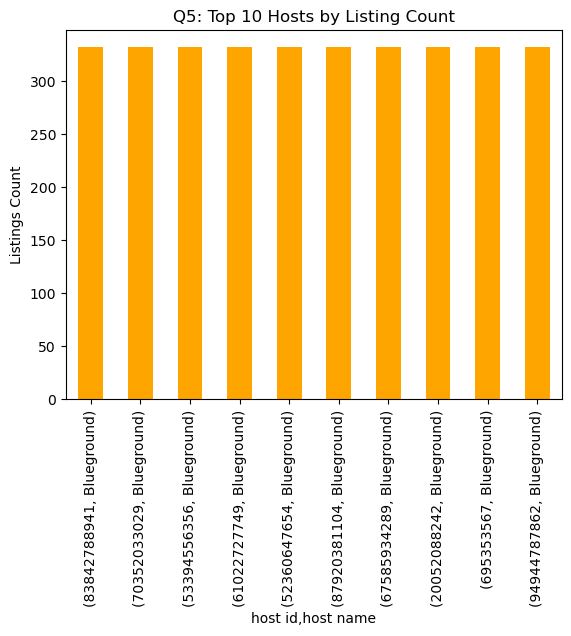

host id      host name 
83842788941  Blueground    332.0
70352033029  Blueground    332.0
53394556356  Blueground    332.0
61022727749  Blueground    332.0
52360647654  Blueground    332.0
87920381104  Blueground    332.0
67585934289  Blueground    332.0
20052088242  Blueground    332.0
695353567    Blueground    332.0
94944787862  Blueground    332.0
Name: calculated host listings count, dtype: float64

In [8]:
hosts = df[['host id','host name','calculated host listings count']].dropna()
top10_hosts = hosts.groupby(['host id','host name'])['calculated host listings count']\
                  .max().sort_values(ascending=False).head(10)
top10_hosts.plot(kind='bar', color='orange')
plt.title("Q5: Top 10 Hosts by Listing Count")
plt.ylabel("Listings Count")
plt.show()
top10_hosts


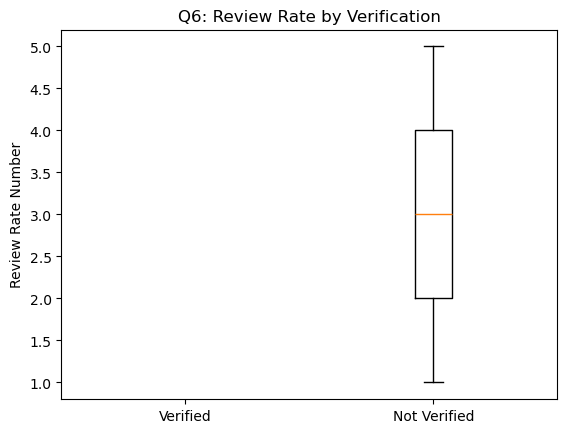

(nan, 3.279221161199239)

In [9]:
df_q6 = df[['host_identity_verified','review rate number']].dropna()
verified = df_q6[df_q6['host_identity_verified'].astype(str).str.lower().str.contains('t')]
not_verified = df_q6[~df_q6['host_identity_verified'].astype(str).str.lower().str.contains('t')]

plt.boxplot([verified['review rate number'], not_verified['review rate number']], 
            labels=['Verified','Not Verified'])
plt.title("Q6: Review Rate by Verification")
plt.ylabel("Review Rate Number")
plt.show()

verified['review rate number'].mean(), not_verified['review rate number'].mean()


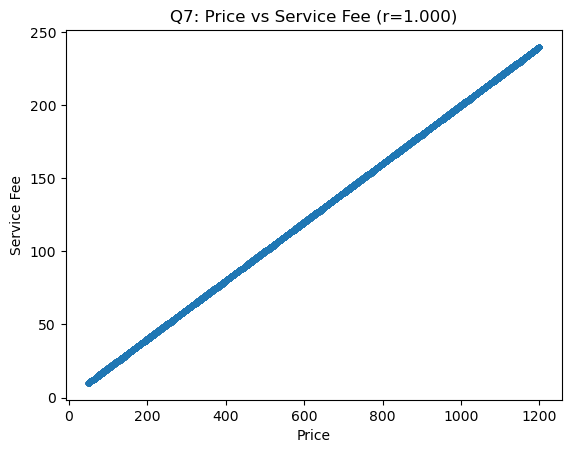

0.9999908755543345

In [10]:
df_q7 = df[['price','service fee']].dropna()
corr_q7 = df_q7['price'].corr(df_q7['service fee'])
plt.scatter(df_q7['price'], df_q7['service fee'], s=8, alpha=0.4)
plt.title(f"Q7: Price vs Service Fee (r={corr_q7:.3f})")
plt.xlabel("Price")
plt.ylabel("Service Fee")
plt.show()
corr_q7


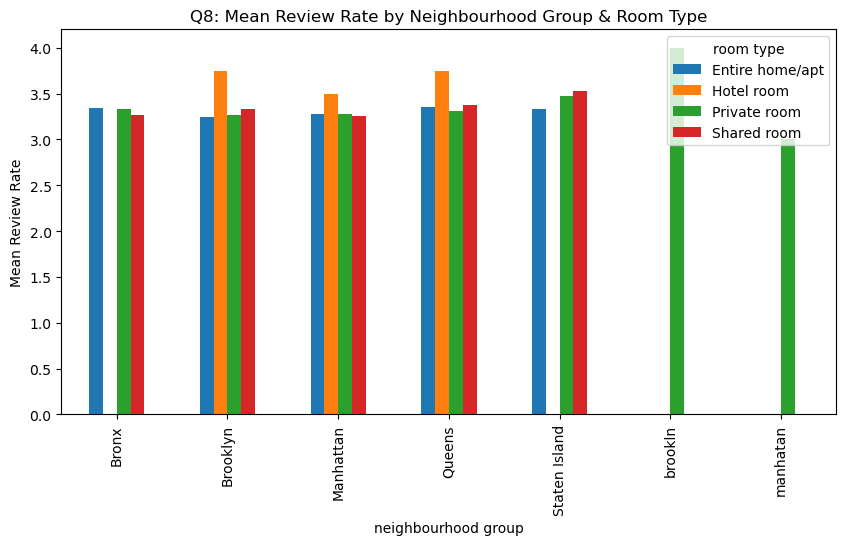

room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.346457,NaN,3.329706,3.264957
Brooklyn,3.250378,3.75,3.264465,3.336983
Manhattan,3.275807,3.50,3.277576,3.257459
Queens,3.349154,3.75,3.315585,3.377778
Staten Island,3.329087,NaN,3.479482,3.533333
brookln,NaN,NaN,4.000000,NaN
manhatan,NaN,NaN,3.000000,NaN


In [11]:
pivot_q8 = df.pivot_table(index='neighbourhood group', 
                          columns='room type', 
                          values='review rate number', aggfunc='mean')
pivot_q8.plot(kind='bar', figsize=(10,5))
plt.title("Q8: Mean Review Rate by Neighbourhood Group & Room Type")
plt.ylabel("Mean Review Rate")
plt.show()
pivot_q8


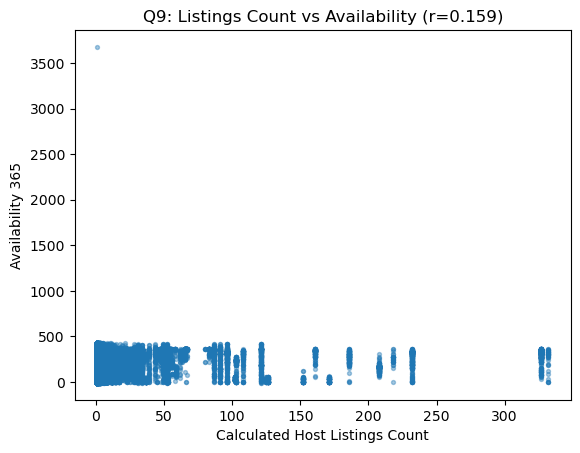

0.1591942422813065

In [12]:
df_q9 = df[['calculated host listings count','availability 365']].dropna()
corr_q9 = df_q9['calculated host listings count'].corr(df_q9['availability 365'])
plt.scatter(df_q9['calculated host listings count'], df_q9['availability 365'], s=8, alpha=0.4)
plt.title(f"Q9: Listings Count vs Availability (r={corr_q9:.3f})")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Availability 365")
plt.show()
corr_q9
